In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [104]:
breaths = ['resting', '6b', '10b', '15b']

df_6b = pd.read_csv('results_etco2[mmHg]_6breaths.csv')
df_10b = pd.read_csv('results_etco2[mmHg]_10breaths.csv')
df_15b = pd.read_csv('results_etco2[mmHg]_15breaths.csv')
df_baseline = pd.read_csv('results_etco2[mmHg]_baseline.csv')
dfs = [df_baseline, df_6b, df_10b, df_15b]

In [105]:
def make_boxplot(dfs, title1, title2, parm1, parm2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    plt.boxplot([df[parm1] for df in dfs], tick_labels=breaths)
    plt.title(title1)
    plt.ylabel(title1)
    plt.subplot(1, 2, 2)
    plt.boxplot([df[parm2] for df in dfs], tick_labels=breaths)
    plt.title(title2)
    plt.ylabel(title2)
    plt.show()

In [106]:
# print mean +- std abp and fv and map for each condition
for df, breath in zip(dfs, breaths):
    print(f"Breath: {breath}")
    print(f"ABP: {df['abp'].mean():.2f} ± {df['abp'].std():.2f}")
    print(f"FV: {df['map'].mean():.2f} ± {df['map'].std():.2f}")
    print(f"MAP: {df['mcbfv'].mean():.2f} ± {df['mcbfv'].std():.2f}")
    print()

Breath: resting
ABP: 95.23 ± 21.96
FV: 100.66 ± 26.20
MAP: 64.32 ± 6.62

Breath: 6b
ABP: 90.17 ± 17.00
FV: 94.62 ± 20.50
MAP: 53.19 ± 11.13

Breath: 10b
ABP: 95.47 ± 16.55
FV: 100.16 ± 16.22
MAP: 50.51 ± 8.68

Breath: 15b
ABP: 94.15 ± 19.94
FV: 97.96 ± 21.89
MAP: 50.30 ± 8.33



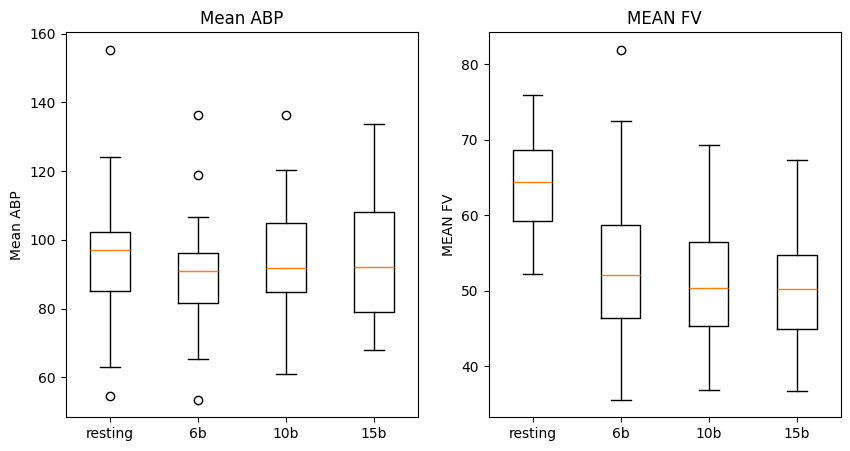

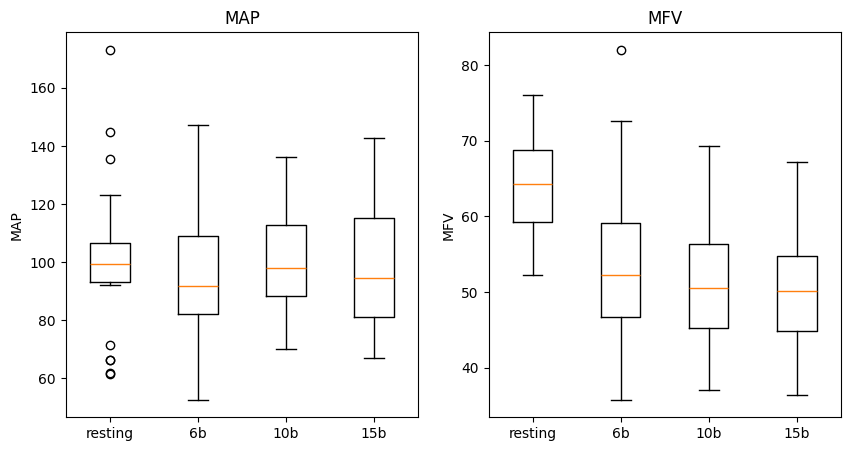

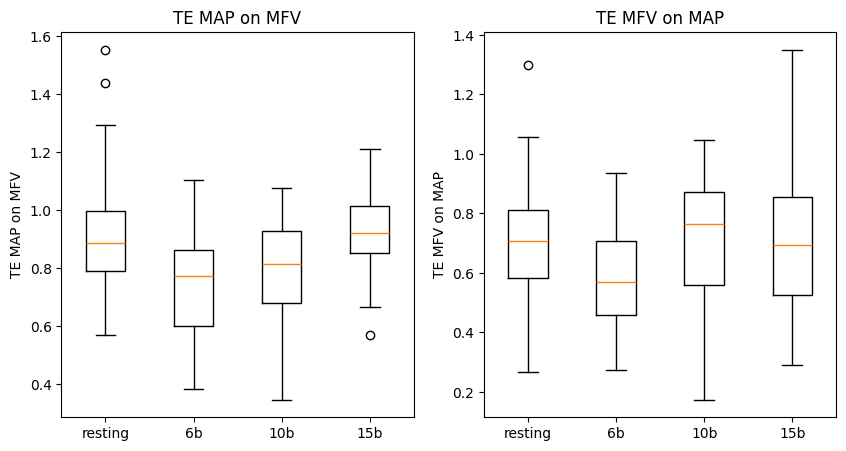

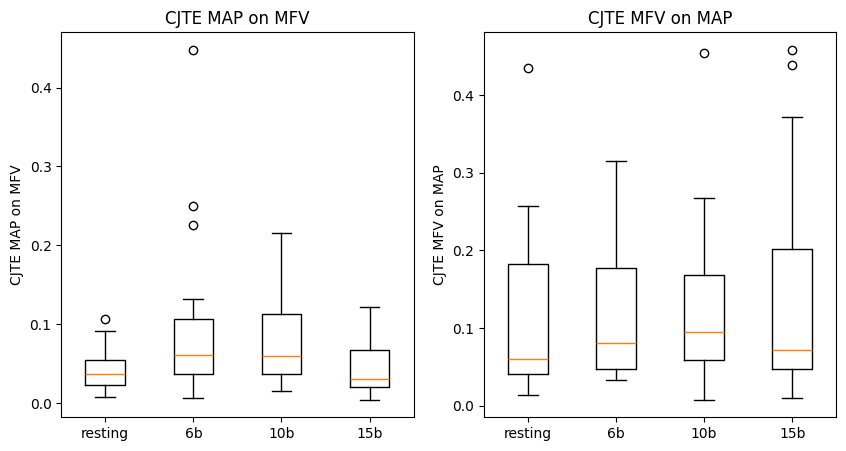

In [107]:
make_boxplot(dfs, 'Mean ABP', 'MEAN FV', 'abp', 'fv')
make_boxplot(dfs, 'MAP', 'MFV', 'map', 'mcbfv')
make_boxplot(dfs, 'TE MAP on MFV', 'TE MFV on MAP', 'te_map_on_mfv', 'te_mfv_on_map')
make_boxplot(dfs, 'CJTE MAP on MFV', 'CJTE MFV on MAP', 'cjte_map_on_mfv', 'cjte_mfv_on_map')

# Statistical Analysis

In [108]:
median_hr = df_baseline['hr'].median()
is_hr_greater_than_median = df_baseline['hr'] > median_hr
is_hr_greater_than_median.to_numpy()

array([ True, False,  True,  True,  True, False, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True, False])

In [109]:
# make long df for anova
df_long = pd.DataFrame()
df_long['subject'] = np.repeat([df_baseline['id'].values], 4, axis=0).flatten()
df_long['breath'] = np.repeat(breaths, len(df_baseline))
df_long['abp'] = np.concatenate([df['abp'].values for df in dfs])
df_long['map'] = np.concatenate([df['map'].values for df in dfs])
df_long['mfv'] = np.concatenate([df['mcbfv'].values for df in dfs])
df_long['te_map_on_mfv'] = np.concatenate([df['te_map_on_mfv'].values for df in dfs])
df_long['te_mfv_on_map'] = np.concatenate([df['te_mfv_on_map'].values for df in dfs])
df_long['cjte_map_on_mfv'] = np.concatenate([df['cjte_map_on_mfv'].values for df in dfs])
df_long['cjte_mfv_on_map'] = np.concatenate([df['cjte_mfv_on_map'].values for df in dfs])
df_long

,subject,breath,abp,map,mfv,te_map_on_mfv,te_mfv_on_map,cjte_map_on_mfv,cjte_mfv_on_map
0,1,resting,63.082342,61.717290,73.760837,0.818470,0.722664,0.038346,0.053341
1,2,resting,54.677347,61.495849,55.941714,0.883583,0.651115,0.030227,0.041689
2,5,resting,99.525773,97.138443,53.084064,1.292434,1.048265,0.008649,0.035362
3,6,resting,96.765051,104.899574,69.484262,1.552725,1.298813,0.030664,0.036265
4,8,resting,66.513653,66.351659,64.470898,0.987764,0.527491,0.023982,0.054619
...,...,...,...,...,...,...,...,...,...
91,32,15b,108.226961,134.432506,40.053207,0.692664,0.895600,0.017558,0.458315
92,33,15b,79.880562,85.817536,56.495263,0.913789,0.618126,0.095348,0.074873
93,34,15b,125.025669,124.662726,50.059548,1.055963,1.018083,0.057444,0.228466
94,36,15b,106.292842,114.653097,67.202480,0.569295,0.289353,0.017621,0.059777


## Repeated Measures ANOVA

In [110]:
variables = ['abp', 'map', 'mfv', 'te_map_on_mfv', 'te_mfv_on_map', 'cjte_map_on_mfv', 'cjte_mfv_on_map']

In [111]:
for var in variables:
    anova = pg.rm_anova(
    dv=var,
    within='breath',
    subject='subject',
    data=df_long
    )
    print(f"ANOVA results for {var}:")
    print(anova)
    print("\n")

ANOVA results for abp:
   Source  ddof1  ddof2         F     p-unc       ng2       eps
0  breath      3     69  1.471018  0.230038  0.012967  0.827599


ANOVA results for map:
   Source  ddof1  ddof2         F     p-unc       ng2       eps
0  breath      3     69  1.134162  0.341417  0.012631  0.809482


ANOVA results for mfv:
   Source  ddof1  ddof2         F         p-unc     p-GG-corr       ng2  \
0  breath      3     69  58.56124  6.164600e-19  1.733071e-14  0.305472   

        eps  sphericity   W-spher   p-spher  
0  0.733424       False  0.545702  0.022086  


ANOVA results for te_map_on_mfv:
   Source  ddof1  ddof2         F     p-unc  p-GG-corr       ng2       eps  \
0  breath      3     69  5.172449  0.002778   0.009916  0.137299  0.652634   

   sphericity   W-spher   p-spher  
0       False  0.364912  0.000556  


ANOVA results for te_mfv_on_map:
   Source  ddof1  ddof2         F     p-unc       ng2       eps
0  breath      3     69  1.394908  0.251715  0.041854  0.835879



In [112]:
posthoc = pg.pairwise_tests(
    dv='mfv',
    within='breath',
    subject='subject',
    data=df_long,
    padjust='bonferroni',
)
posthoc = posthoc[['A', 'B', 'p-corr']]
posthoc= posthoc[posthoc['p-corr'] < 0.05]
posthoc

,A,B,p-corr
2,10b,resting,2.546114e-10
4,15b,resting,2.259258e-09
5,6b,resting,3.483272e-06


In [113]:
posthoc = pg.pairwise_tests(
    dv='te_map_on_mfv',
    within='breath',
    subject='subject',
    data=df_long,
    padjust='bonferroni',
)
posthoc = posthoc[['A', 'B', 'p-corr']]
posthoc= posthoc[posthoc['p-corr'] < 0.05]
posthoc

,A,B,p-corr
0,10b,15b,0.00733
3,15b,6b,0.00007


In [114]:
posthoc = pg.pairwise_tests(
    dv='cjte_map_on_mfv',
    within='breath',
    subject='subject',
    data=df_long,
    padjust='bonferroni',
)
posthoc = posthoc[['A', 'B', 'p-corr']]
posthoc= posthoc[posthoc['p-corr'] < 0.05]
posthoc

,A,B,p-corr
2,10b,resting,0.03053
